<a href="https://colab.research.google.com/github/Tayara32/Challenge-TelecomX_Parte2/blob/main/ChallengeTelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChallengeTelecomX - Parte 2

## Preparação dos dados

### Extração do Arquivo Tratado

In [9]:
import pandas as pd

In [10]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [11]:
dados.head()

,id_cliente,cancelamento,genero_cliente,cliente_idoso,possui_companheiro,possui_dependentes,tempo_como_cliente,servico_telefonico,multiplas_linhas,tipo_servico_internet,...,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_eletronica,metodo_pagamento,cobranca_mensal,cobranca_total,contas_diarias,qtd_servicos
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,1,1,0,one_year,1,mailed_check,65.6,593.30,2.19,2
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,1,month-to-month,0,mailed_check,59.9,542.40,2.00,1
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber_optic,...,0,0,0,month-to-month,1,electronic_check,73.9,280.85,2.46,1
3,0011-igkff,1,male,1,1,0,13,1,0,fiber_optic,...,0,1,1,month-to-month,1,electronic_check,98.0,1237.85,3.27,3
4,0013-exchz,1,female,1,1,0,3,1,0,fiber_optic,...,1,1,0,month-to-month,1,mailed_check,83.9,267.40,2.80,2


### Remoção de Colunas Irrelevantes

In [12]:
dados = dados.drop(columns=['id_cliente'])

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cancelamento           7267 non-null   int64  
 1   genero_cliente         7267 non-null   object 
 2   cliente_idoso          7267 non-null   int64  
 3   possui_companheiro     7267 non-null   int64  
 4   possui_dependentes     7267 non-null   int64  
 5   tempo_como_cliente     7267 non-null   int64  
 6   servico_telefonico     7267 non-null   int64  
 7   multiplas_linhas       7267 non-null   int64  
 8   tipo_servico_internet  7267 non-null   object 
 9   seguranca_online       7267 non-null   int64  
 10  backup_online          7267 non-null   int64  
 11  protecao_dispositivo   7267 non-null   int64  
 12  suporte_tecnico        7267 non-null   int64  
 13  streaming_tv           7267 non-null   int64  
 14  streaming_filmes       7267 non-null   int64  
 15  tipo

In [14]:
dados = dados.drop(columns=['backup_online'])

### Encoding

In [15]:
# Verificar quais são as colunas categóricas
colunas_categoricas = ['genero_cliente', 'tipo_servico_internet', 'tipo_contrato', 'metodo_pagamento']

In [16]:
# Aplica One-Hot Encoding nas colunas categóricas
df_encoding = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)

In [17]:
# Verifica o novo DataFrame
df_encoding.head()

,cancelamento,cliente_idoso,possui_companheiro,possui_dependentes,tempo_como_cliente,servico_telefonico,multiplas_linhas,seguranca_online,protecao_dispositivo,suporte_tecnico,...,contas_diarias,qtd_servicos,genero_cliente_male,tipo_servico_internet_fiber_optic,tipo_servico_internet_no,tipo_contrato_one_year,tipo_contrato_two_year,metodo_pagamento_credit_card_(automatic),metodo_pagamento_electronic_check,metodo_pagamento_mailed_check
0,0,0,1,1,9,1,0,0,0,1,...,2.19,2,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,2.00,1,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,1,0,...,2.46,1,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,0,...,3.27,3,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,1,...,2.80,2,False,True,False,False,False,False,False,True


### Verificação da Proporção de Evasão

In [18]:
df_encoding['cancelamento'].value_counts()

,count
cancelamento,
0,5398
1,1869


In [19]:
import numpy as np

proporcao_cancelou = np.mean(df_encoding['cancelamento'])
proporcao_permaneceram = 1 - proporcao_cancelou

print(f"Cancelou: {proporcao_cancelou:.2%}")
print(f"Permaneceu: {proporcao_permaneceram:.2%}")


Cancelou: 25.72%
Permaneceu: 74.28%


Temos aproximadamente 26% de cancelamento e 74% de permanência, não tende a ser um desequilíbrio extremo, mas pode impactar modelos preditivos.

##  Correlação e Seleção de Variáveis

cancelamento                                1.000000
tipo_servico_internet_fiber_optic           0.300949
metodo_pagamento_electronic_check           0.294626
contas_diarias                              0.189918
cobranca_mensal                             0.189866
fatura_eletronica                           0.186666
cliente_idoso                               0.146733
streaming_tv                                0.062430
streaming_filmes                            0.060586
multiplas_linhas                            0.039343
servico_telefonico                          0.012571
genero_cliente_male                        -0.009555
protecao_dispositivo                       -0.063452
qtd_servicos                               -0.074217
metodo_pagamento_mailed_check              -0.090061
metodo_pagamento_credit_card_(automatic)   -0.131085
possui_companheiro                         -0.148546
suporte_tecnico                            -0.160440
possui_dependentes                         -0.

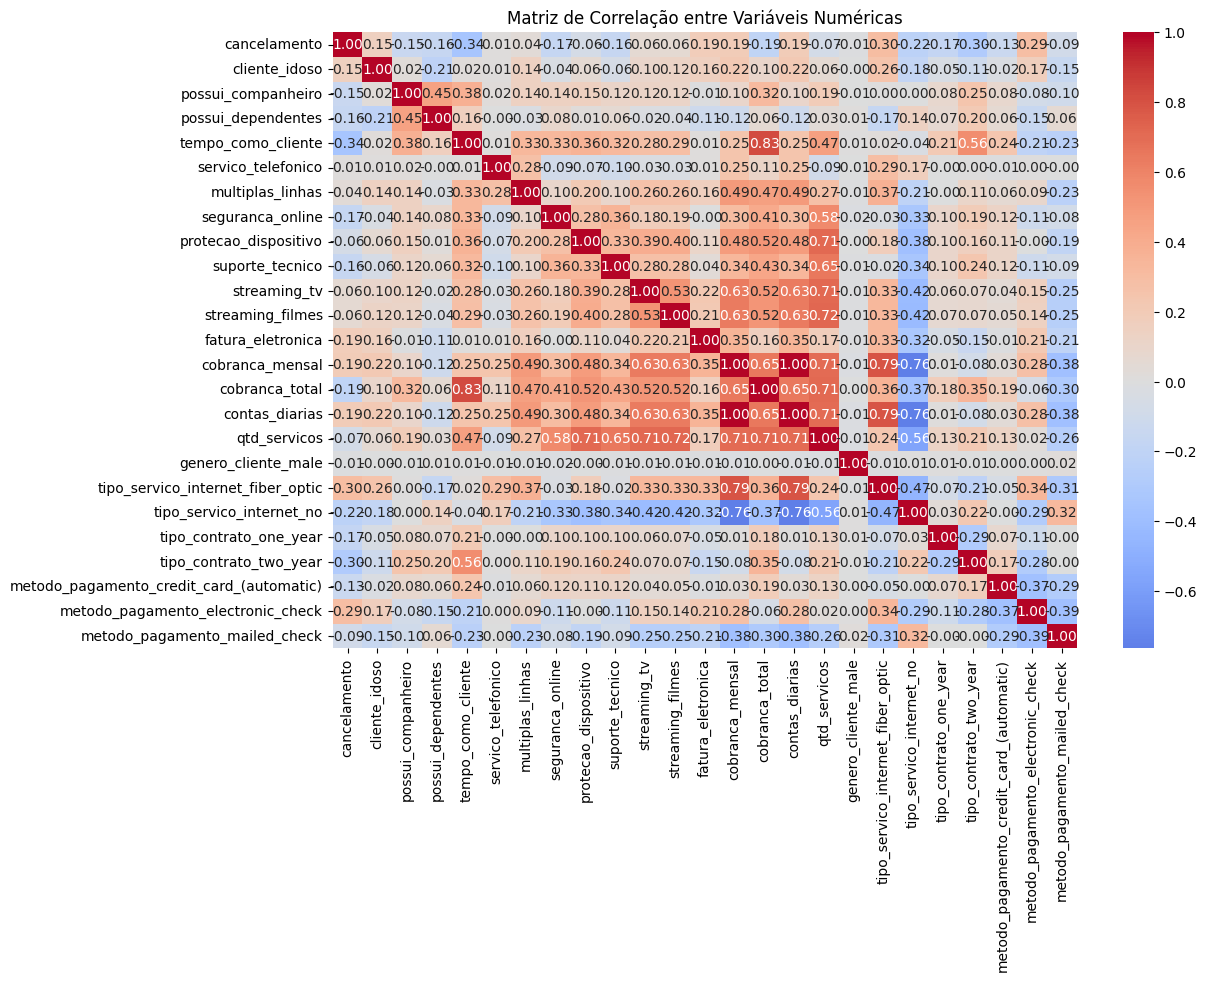

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlação
corr = df_encoding.corr()

# Mostrar correlação das variáveis com 'cancelamento', ordenada do maior para o menor
print(corr['cancelamento'].sort_values(ascending=False))

# Plotar heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


In [21]:
corr = df_encoding.corr()
# Selecionar colunas com correlação absoluta >= 0.15 com cancelamento, ignorando NaN
cols_fortes = corr['cancelamento'].abs()[corr['cancelamento'].abs() >= 0.15].index.tolist()

print("Colunas com correlação significativa:", cols_fortes)

Colunas com correlação significativa: ['cancelamento', 'possui_dependentes', 'tempo_como_cliente', 'seguranca_online', 'suporte_tecnico', 'fatura_eletronica', 'cobranca_mensal', 'cobranca_total', 'contas_diarias', 'tipo_servico_internet_fiber_optic', 'tipo_servico_internet_no', 'tipo_contrato_one_year', 'tipo_contrato_two_year', 'metodo_pagamento_electronic_check']


In [22]:
df_modelo = df_encoding[cols_fortes].copy()

# 1. Separando variáveis
X = df_modelo.drop('cancelamento', axis=1)
y = df_modelo['cancelamento']


### Análises Direcionadas

#### Tempo de contrato × Evasão (boxplot)

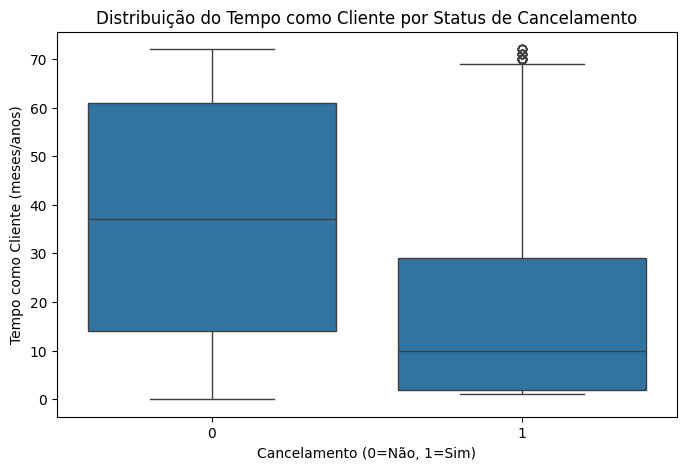

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cancelamento', y='tempo_como_cliente', data=df_modelo)
plt.title('Distribuição do Tempo como Cliente por Status de Cancelamento')
plt.xlabel('Cancelamento (0=Não, 1=Sim)')
plt.ylabel('Tempo como Cliente (meses/anos)')
plt.show()

####  Total gasto × Evasão (scatter plot)

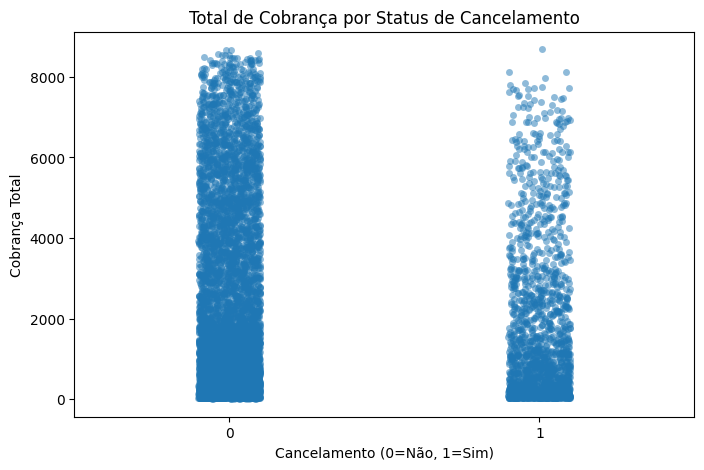

In [24]:
plt.figure(figsize=(8,5))
sns.stripplot(x='cancelamento', y='cobranca_total', data=df_modelo, jitter=True, alpha=0.5)
plt.title('Total de Cobrança por Status de Cancelamento')
plt.xlabel('Cancelamento (0=Não, 1=Sim)')
plt.ylabel('Cobrança Total')
plt.show()

#### Tempo como cliente X Cobrança total

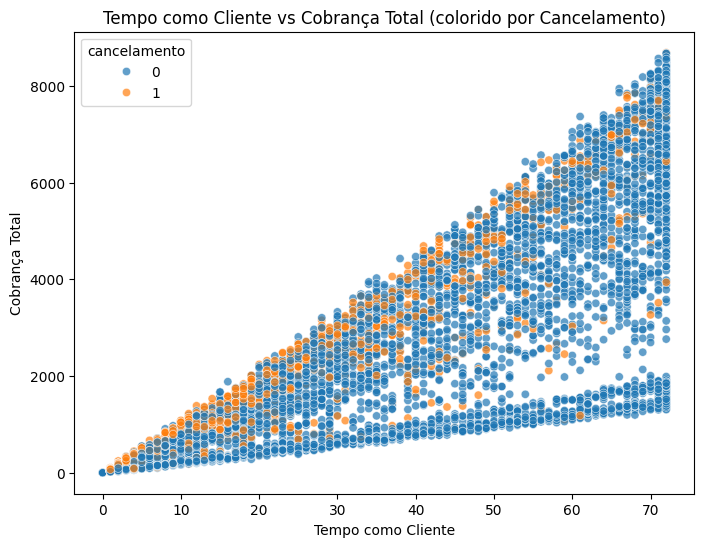

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='tempo_como_cliente', y='cobranca_total', hue='cancelamento', data=df_modelo, alpha=0.7)
plt.title('Tempo como Cliente vs Cobrança Total (colorido por Cancelamento)')
plt.xlabel('Tempo como Cliente')
plt.ylabel('Cobrança Total')
plt.show()


## Modelagem Preditiva

### Separação de Dados

In [26]:
from sklearn.model_selection import train_test_split

# 2. Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% pra teste
    random_state=42,  # fixar aleatoriedade pra resultados reproduzíveis
    stratify=y  # garante proporção igual das classes em treino e teste

)


### Criação de Modelos

#### Modelo 1: Regressão Logística

Regressão logística é um modelo linear que calcula probabilidades usando funções matemáticas sensíveis à escala das variáveis. Se os dados tiverem escalas diferentes (por exemplo, cobrança mensal em centenas e qtd_servicos em unidades), ele pode "pesar" mais algumas features que outras por causa disso. Normalizar evita esse problema, colocando tudo numa mesma base.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 3. Normalizando
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# 5. Treinando Regressão Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_res, y_train_res)

# 6. Avaliando
y_pred = logreg.predict(X_test_scaled)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))





Acurácia: 0.7391104997707474
[[1157  463]
 [ 106  455]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1620
           1       0.50      0.81      0.62       561

    accuracy                           0.74      2181
   macro avg       0.71      0.76      0.71      2181
weighted avg       0.81      0.74      0.75      2181



**Acurácia** de aproximadamente 74% - isso significa que o modelo acertou 74% dos casos no total.

**Matriz de Confusão**

* VP (verdadeiros negativos): 1157 clientes que não cancelaram e foram corretamente previstos.

* FP (falsos positivos): 463 clientes que não cancelaram, mas o modelo previu cancelamento.

* FN (falsos negativos): 106 clientes que cancelaram, mas o modelo previu que não cancelariam.

* VN (verdadeiros positivos): 455 clientes que cancelaram e o modelo acertou.

**Foco especial**

**Recall = 0.81** → O modelo identificou 81% dos cancelamentos reais. Isso é muito bom para prevenção de churn.

**Precision = 0.50** → Porém, quando o modelo prevê "vai cancelar", ele acerta só 50% das vezes.

#### Modelo 2: Random Forest

Modelos de árvore, como Random Forest, criam regras baseadas em divisões (ex: feature X > 10). A escala dos dados não interfere na divisão, então normalizar não muda nada. Além disso, Random Forest é ótimo pra capturar relações não lineares e interações complexas.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. (Reutilar X, y, X_train, y_train, X_test, y_test já definidos)

# 2. Não é necessário normalizar para Random Forest

# 3. Aplicar SMOTE no conjunto de treino original
X_train_res_rf, y_train_res_rf = smote.fit_resample(X_train, y_train)

# 4. Treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res_rf, y_train_res_rf)

# 5. Avaliação no conjunto de teste
y_pred_rf = rf.predict(X_test)

print("Acurácia (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Acurácia (Random Forest): 0.7602017423200367
[[1337  283]
 [ 240  321]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1620
           1       0.53      0.57      0.55       561

    accuracy                           0.76      2181
   macro avg       0.69      0.70      0.69      2181
weighted avg       0.77      0.76      0.76      2181



**Acurácia** de aproximadamente 76%

**Matriz de Confusão**

* VP (verdadeiros negativos): 1323 clientes que não cancelaram e foram corretamente previstos.

* FP (falsos positivos): 297 clientes que não cancelaram, mas o modelo previu cancelamento.

* FN (falsos negativos): 225 clientes que cancelaram, mas o modelo previu que não cancelariam.

* VN (verdadeiros positivos): 336 clientes que cancelaram e o modelo acertou.

**Foco especial**

**Recall = 0.60** → O modelo identificou 60% dos clientes que realmente cancelaram. Isso é razoável, mas menor que o modelo anterior. Pode servir para prevenção de churn, mas deixa escapar mais casos do que a Regressão Logística.

**Precision = 0.53** → Quando o modelo prevê que um cliente vai cancelar, ele acerta em 53% dos casos. Ou seja, é ligeiramente mais preciso nos alertas do que a Regressão Logística, com menos falsos alarmes.

### Avaliação dos Modelos

O **Modelo de Regressã**o Logística apresentgou os eguintes dados:

* Acurácia: 0.739

* Precisão (classe 1 - cancelamento): 0.50

* Recall (classe 1): 0.81

* F1-score (classe 1): 0.62

Enquanto o **Modelo de Random Forest** apresentou dados:

* Acurácia: 0.761

* Precisão (classe 1 - cancelamento): 0.53

* Recall (classe 1): 0.60

* F1-score (classe 1): 0.56

####  Qual modelo teve o melhor desempenho?

O Random Forest teve maior acurácia e precisão, ou seja, menos falsos alarmes, enquanto a Regressão Logística teve recall muito superior, ou seja, detectou mais clientes que cancelaram. Ou seja, se o objetivo do negócio for prevenir churn proativamente, a Regressão Logística é preferível. Se for minimizar alarmes falsos, o Random Forest é mais adequado.

#### Overfitting ou Underfitting?

**Regressão Logística**

Não apresenta sinais de underfitting. Apresenta desempenho equilibrado. O recall alto indica boa sensibilidade, e o F1-score razoável mostra que o modelo está generalizando bem.

**Random Forest**

Indicios leves de overfitting. Desempenho bom em acurácia e precisão, mas o recall caiu bastante (60%), o que pode indicar que o modelo está mais conservador.